In [350]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon
pd.set_option('display.max_columns', None)

In [52]:
beaches = gpd.read_file("natural_assets_data_raw/beaches.gpkg")
forests = gpd.read_file("natural_assets_data_raw/forest.gpkg")
forest_lnd_use = gpd.read_file("natural_assets_data_raw/forest_lnd_use.gpkg")
gardens = gpd.read_file("natural_assets_data_raw/gardens_over10ha.gpkg")
nature_reserves = gpd.read_file("natural_assets_data_raw/nature_reserves_over100ha.gpkg")
parks = gpd.read_file("natural_assets_data_raw/beaches.gpkg")
protected_areas = gpd.read_file("natural_assets_data_raw/protected_areas.gpkg")
heritage_coast = gpd.read_file("natural_assets_data_raw/Heritage_Coasts_England_-8361361223896276779.gpkg")
bird_sites = gpd.read_file("natural_assets_data_raw/IBAs_UK_-8129902679595446195.gpkg")

/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:196: RuntimeWarning: Non-conformant content for record 1 in column AddedDate, 2012-09-06T00:00:00.0Z, successfully parsed
  return ogr_read(


In [53]:
small_protected_areas = protected_areas[protected_areas.geometry.area < 200_000_000]
large_protected_areas = protected_areas[protected_areas.geometry.area > 200_000_000]

In [54]:
# fig, ax = plt.subplots(figsize=(20, 20))

# large_protected_areas.plot(ax=ax, facecolor="blue", alpha=0.2)
# small_protected_areas.plot(ax=ax, facecolor="red", alpha=1)

# plt.title("Large vs small protected areas")
# plt.legend()
# plt.axis('off')
# plt.show()

In [58]:
# fig, ax = plt.subplots(figsize=(20, 20))

# forest_lnd_use.plot(ax=ax, facecolor="blue", alpha=0.8)
# plt.title("Small natural assets")
# plt.legend()
# plt.axis('off')
# plt.show()

In [60]:
small_combined = pd.concat([beaches, forests, gardens, nature_reserves, parks, small_protected_areas, forest_lnd_use], ignore_index=True)
large_combined = pd.concat([large_protected_areas, heritage_coast], ignore_index=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


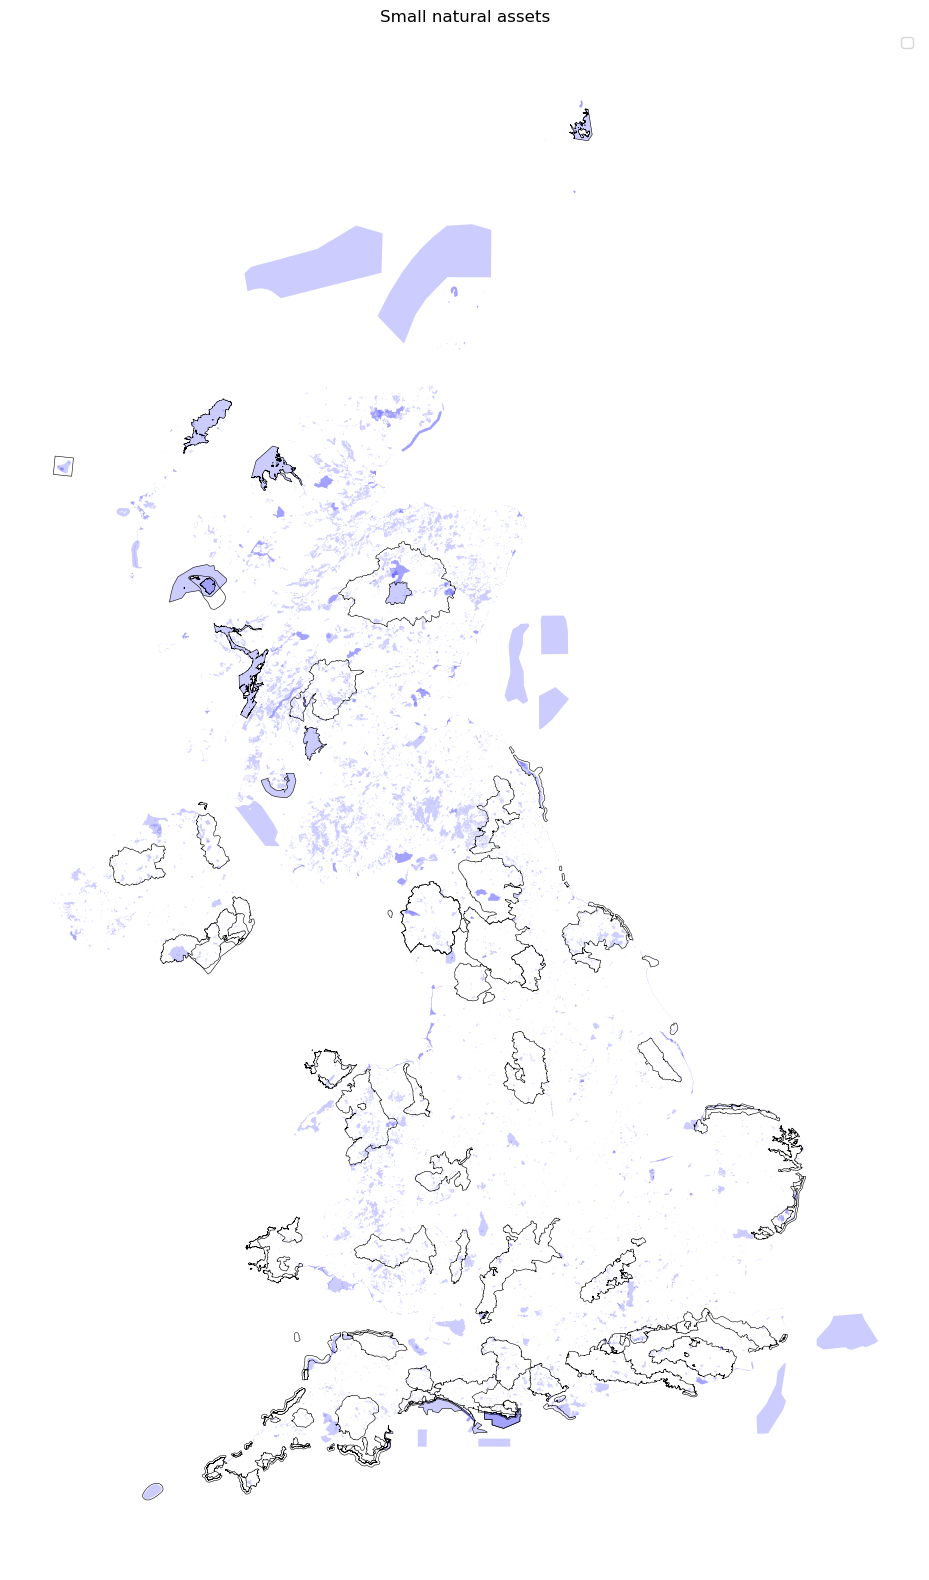

In [62]:
fig, ax = plt.subplots(figsize=(20, 20))

small_combined.plot(ax=ax, facecolor="blue", alpha=0.2)
large_combined.plot(ax=ax, facecolor="none", linewidth=0.4, edgecolor="black")

plt.title("Small natural assets")
plt.legend()
plt.axis('off')
plt.show()

In [349]:
uk_boundaries = gpd.read_file("natural_assets_data_raw/uk_boundaries.gpkg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


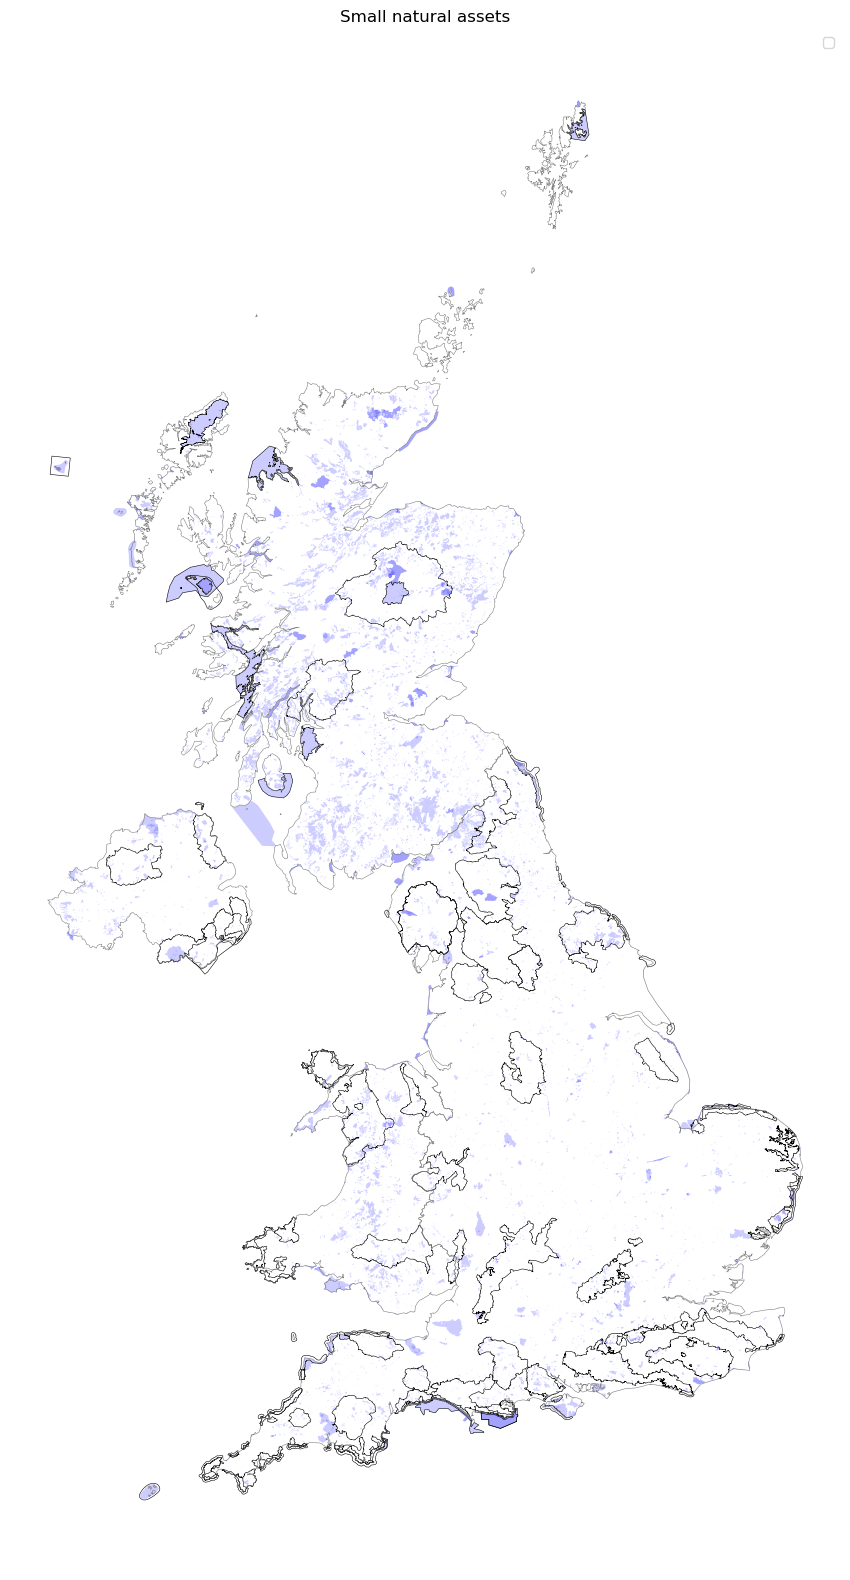

In [66]:
fig, ax = plt.subplots(figsize=(20, 20))

small_combined_cropped.plot(ax=ax, facecolor="blue", alpha=0.2)
large_combined_cropped.plot(ax=ax, facecolor="none", linewidth=0.4, edgecolor="black")
uk_boundaries.plot(ax=ax, facecolor="none", linewidth=0.4, edgecolor="grey")

plt.title("Small natural assets")
plt.legend()
plt.axis('off')
plt.show()

## Dropping places without names

In [87]:
small_combined_dropna = small_combined.dropna(subset=["name"])

In [92]:
small_combined_dropna.head()

,name,natural,surface,description,lifeguard,supervised,alt_name,alt_name:en,name:en,name:gd,wheelchair,website,fixme,source,name:cy,wikidata,access,fee,image,nudism,wikipedia,url,tourism,note,operator,tidal,dog,highway,area,alt_name:gd,designation,source:name,wetland,layer,name:kw,water,sport,ref,dog:conditional,opening_hours,operator:wikidata,addr:city,foot,fishing,alt_name:cy,vehicle,type,motor_vehicle,landuse,start_date,leisure,horse,ref:GB:uprn,addr:country,owner,waterway,coast_award_sum,geometry,boundary,operator:type,garden:type,old_name,garden:style,email,addr:postcode,addr:street,charge,phone,payment:cash,barrier,fhrs:id,survey:date,heritage,addr:housename,attraction,contact:facebook,contact:instagram,addr:suburb,name:ru,name:fr,loc_name,contact:website,name:de,historic,name:ga,toilets:wheelchair,wikimedia_commons,addr:place,fax,source:area,name:it,name:pl,heritage:operator,listed_status,name:ar,name:bg,name:ca,name:cs,name:es,name:eu,name:fa,name:he,name:ja,name:nl,name:pt,name:sk,name:sl,name:sv,name:th,name:tr,name:uk,name:vi,name:zh,contact:youtube,fee:conditional,opening_hours:url,contact:phone,name:ko,contact:email,check_date:opening_hours,payment:credit_cards,payment:debit_cards,name:ceb,name:id,name:ml,name:pms,nohousenumber,source:geometry,HE_ref,contact:twitter,listed_status:source,fhrs:authority,contact:tripadvisor,source:addr:postcode,fhrs:inspectiondate,fhrs:rating,source:phone,acres,founder,operator:wikipedia,protected,place,leaf_cycle,leaf_type,protection_title,source:name:ga,protect_class,seamark:restricted_area:restriction,seamark:type,short_name,disused:aeroway,disused:military,operator:short,official_name,salt,source_ref:ref,grassland,conservation,communication:amateur_radio:pota,Lowland,addr:hamlet,fence_type,valid_from,hectares,source:leisure,deciduous,ramsar,name:is,short_name:cs,camping,access_land,url:bexhillnature,wikimedia_commons:pano,ref:charity,wikimedia_commons:1,wikimedia_commons:2,landform,note_2,name:nn,short_name:gd,protected_area,short_name:en,name:mk,addr:village,contact:mobile,ref:FR:INPN,website:source,seamark:name,seamark:restricted_area:category,related_law,protect_id,boundary_type,geological,archaeological_site,not:operator:wikidata,size,intermittent,managed,ruins,ref:whc,whc:criteria,whc:inscription_date,military,access:conditional,heritage:website,historic:civilization,historic:era,historic:period,whc:name,whc:website,whc:wikipedia,location,megalith_type,name:non,notified_feature,resource,man_made,governance_type,civilization,ownership,protection_title2,disused:man_made,disused:product,plant,protection_object,name:la,check_date,historic:operator,fixme:designation,source:designation,note:name,note:landuse,embankment,fortification_type,abandoned:landuse,conservation_organization,protection_aim,amenity,source:protection_title,denomination,ele,name:signed,plant_community,species,basin,flood_prone,FIXME,boundary_1,name:be,name:br,name:da,name:hy,name:no,meadow,source:description,landcover,top_soil,period,animal,animal_shelter,animal_shelter:release,animal_shelter:sanctuary,material,residential,alt_website,park,inscription,storage,disused:landuse,name:lt,geopark,full_name,ref:gss,source:ref:gss,old_name:cy,old_name:en,name:fi,name:gl,short_name:cy,wikipedia:cy,name:el,name:hr,name:hu,name:ka,name:sq,mapillary,ref:cadw,common_good_land,precision,heritage:ref,name:mt,name:pnb,name:sh,name:qu,protected_area:designation,license_notice,name:ang,name:wuu,twitter,created_by,forest,was:leisure,produce,species:en,multipolygon,plantation,facebook,trees,disused,fix_me,weapons,genus,genus:en,note_1,fence,crop,was:natural,source:alt_name,coniferous,geograph:id,plant_community:gb:phase1,plant_community_ref:gb:phase1,_ID_,is_in,height,species:wikidata,agricultural,historic:landuse,is_in:country_code,is_in:county,is_in:region,is_in:national_park,religion,species:wikipedia,zoo,private,name:alt,scenic,construction_date,source:shape,source_ref,alt_name:sco,name:sco,age,source:outline,so,level,taxon,wa

In [90]:
small_combined_dropna["name"].isna().sum()

0

In [93]:
# fig, ax = plt.subplots(figsize=(20, 20))

# small_combined_dropna.plot(ax=ax, facecolor="blue", alpha=0.2)
# # large_combined_cropped.plot(ax=ax, facecolor="none", linewidth=0.4, edgecolor="black")
# # uk_boundaries.plot(ax=ax, facecolor="none", linewidth=0.4, edgecolor="grey")

# plt.title("Small natural assets")
# plt.legend()
# plt.axis('off')
# plt.show()

## Dropping rows where access is private

In [356]:
small_combined_dropna = small_combined_dropna[~small_combined_dropna["access"].isin(["private", "no"])]

## Columns to drop

In [357]:
# Drop columns that contain names in other languages
language_name = small_combined[(col for col in small_combined_dropna.columns if col.startswith("name:"))].columns
small_combined_dropna_filtered_columns = small_combined_dropna.drop(columns=language_name, axis=1)

In [358]:
# Drop columns that contain alternative names in other languages
alt_language_name = small_combined[(col for col in small_combined_dropna.columns if col.startswith("alt_name:"))].columns
small_combined_dropna_filtered_columns = small_combined_dropna_filtered_columns.drop(columns=alt_language_name, axis=1)

In [359]:
# Combine website and url
small_combined_dropna_filtered_columns["website"] = small_combined_dropna_filtered_columns["website"].fillna(small_combined_dropna_filtered_columns["url"])

In [360]:
# Make tourism col a boolean
small_combined_dropna_filtered_columns["tourism"] = small_combined_dropna_filtered_columns["tourism"].notna()

In [361]:
# Creating a column with special nature designations

# Create a new column first
small_combined_dropna_filtered_columns["designated"] = None

# Assign values based on keyword matches
small_combined_dropna_filtered_columns.loc[
    small_combined_dropna_filtered_columns["designation"].str.contains("site of special scientific interest", case=False, na=False),
    "designated"
] = "Site of Special Scientific Interest"

small_combined_dropna_filtered_columns.loc[
    small_combined_dropna_filtered_columns["designation"].str.contains("area of special scientific interest", case=False, na=False),
    "designated"
] = "ASSI"

small_combined_dropna_filtered_columns.loc[
    small_combined_dropna_filtered_columns["designation"].str.contains("reserve", case=False, na=False),
    "designated"
] = "Nature Reserve"

small_combined_dropna_filtered_columns.loc[
    small_combined_dropna_filtered_columns["designation"].str.contains("area_of_outstanding_natural_beauty", case=False, na=False) |
    small_combined_dropna_filtered_columns["designation"].str.contains("AONB", case=False, na=False),
    "designated"
] = "Area of Outstanding Natural Beauty"

small_combined_dropna_filtered_columns.loc[
    small_combined_dropna_filtered_columns["designation"].str.contains("conservation", case=False, na=False),
    "designated"
] = "Nature Conservation Zone"

# Fill anything else as "Other Natural Area"
small_combined_dropna_filtered_columns["designated"] = small_combined_dropna_filtered_columns["designated"].fillna("Other Natural Area")

In [362]:
# Drop columns with semicolon
semicolon_cols = [col for col in small_combined_dropna_filtered_columns.columns if ":" in col]
small_combined_dropna_filtered_columns = small_combined_dropna_filtered_columns.drop(columns=semicolon_cols)

In [363]:
# Creating a column with type of the feature

# Create a new column first
small_combined_dropna_filtered_columns["feature_type"] = None

# Assign values based on keyword matches
small_combined_dropna_filtered_columns.loc[
    (small_combined_dropna_filtered_columns["wetland"].notna()) | 
    (small_combined_dropna_filtered_columns["natural"] == "wetland"),
    "feature_type"
] = "Wetland"

small_combined_dropna_filtered_columns.loc[
    (small_combined_dropna_filtered_columns["landuse"] == "forest") | 
    (small_combined_dropna_filtered_columns["natural"] == "wood") | 
    (small_combined_dropna_filtered_columns["natural"] == "forest"),
    "feature_type"
] = "Forest"

small_combined_dropna_filtered_columns.loc[
    (small_combined_dropna_filtered_columns["landuse"] == "meadow") | 
    (small_combined_dropna_filtered_columns["landuse"] == "grass") | 
    (small_combined_dropna_filtered_columns["landuse"] == "grassland") | 
    (small_combined_dropna_filtered_columns["natural"] == "heath") | 
    (small_combined_dropna_filtered_columns["natural"] == "grassland") | 
    (small_combined_dropna_filtered_columns["natural"] == "grass") | 
    (small_combined_dropna_filtered_columns["natural"] == "grassland") | 
    (small_combined_dropna_filtered_columns["natural"] == "moor"),
    "feature_type"
] = "Meadows and Grasslands"

small_combined_dropna_filtered_columns.loc[
    (small_combined_dropna_filtered_columns["park"].notna()) |
    (small_combined_dropna_filtered_columns["leisure"] == "park"),
    "feature_type"
] = "Park"

small_combined_dropna_filtered_columns.loc[
    (small_combined_dropna_filtered_columns["leisure"] == "garden")| 
    (small_combined_dropna_filtered_columns["historic"] == "garden") | 
    (small_combined_dropna_filtered_columns["attraction"] == "garden") ,
    "feature_type"
] = "Garden"

small_combined_dropna_filtered_columns.loc[
    (small_combined_dropna_filtered_columns["coast_award_sum"].notna()) | 
    (small_combined_dropna_filtered_columns["natural"] == "beach") | 
    (small_combined_dropna_filtered_columns["natural"] == "coastline") | 
    (small_combined_dropna_filtered_columns["natural"] == "sand_dunes") | 
    (small_combined_dropna_filtered_columns["natural"] == "dune"),
    "feature_type"
] = "Beach"

# Fill anything else as "Other Natural Area"
small_combined_dropna_filtered_columns["feature_type"] = small_combined_dropna_filtered_columns["feature_type"].fillna("Other")

In [364]:
# Creating a column with type of the feature

# Create a new column first
small_combined_dropna_filtered_columns["heritage_type"] = None

small_combined_dropna_filtered_columns.loc[ 
    (small_combined_dropna_filtered_columns["archaeological_site"].notna()) |    
    (small_combined_dropna_filtered_columns["historic"] == "archaeological_site"),
    "heritage_type"
] = "Ancient Remains"

small_combined_dropna_filtered_columns.loc[ 
    (small_combined_dropna_filtered_columns["historic"] == "garden"),
    "heritage_type"
] = "Historic Garden"

small_combined_dropna_filtered_columns.loc[ 
    (small_combined_dropna_filtered_columns["historic"] == "castle"),
    "heritage_type"
] = "Castle Park"

# Fill anything else as "Other Natural Area"
small_combined_dropna_filtered_columns["feature_type"] = small_combined_dropna_filtered_columns["feature_type"].fillna("Other")

In [365]:
# Combine website and url
small_combined_dropna_filtered_columns["coast_award_sum"] = small_combined_dropna_filtered_columns["coast_award_sum"].fillna(0)

In [366]:
# Combine website and url
small_combined_dropna_filtered_columns["description"] = small_combined_dropna_filtered_columns["description"].fillna("To be filled")

In [367]:
# Drop some columns
small_combined_dropna_filtered_columns = small_combined_dropna_filtered_columns.drop(columns=[
    "surface", "lifeguard", "supervised", "alt_name", "fixme", "source", "fee", "image", "nudism", "url", "note", "operator",
    "tidal", "dog", "highway", "area", "designation", "type", "boundary", "leaf_cycle", "leaf_type", "protection_title",
    "protect_class", "produce", "short_name", "camping", "wetland", "water", "ref", "opening_hours", "foot", "vehicle",
    "waterway", "natural", "landuse"], axis=1)

In [368]:
# Drop columns where there are few values
small_combined_dropna_filtered_columns = small_combined_dropna_filtered_columns.loc[:, small_combined_dropna_filtered_columns.isna().mean() < 0.97]

In [369]:
small_combined_dropna_filtered_columns.head(5)

,name,description,website,wikidata,access,wikipedia,tourism,leisure,coast_award_sum,geometry,designated,feature_type
0,Drum Sands,To be filled,None,None,None,None,False,None,0.0,"MULTIPOLYGON (((320716.603 677076.823, 320669....",Other Natural Area,Beach
1,White Park Bay,To be filled,None,Q16903231,None,None,False,None,0.0,"MULTIPOLYGON (((119462.764 602141.967, 119545....",Other Natural Area,Beach
2,Sand Bay,To be filled,None,Q7415759,None,en:Sand Bay,False,None,0.0,"MULTIPOLYGON (((332780.459 163169.415, 332778....",Other Natural Area,Beach
3,Orford Beach,To be filled,None,None,None,None,False,None,0.0,"MULTIPOLYGON (((637525.866 243682.808, 637532....",Other Natural Area,Beach
6,Porth Beach,To be filled,None,None,None,None,False,None,0.0,"MULTIPOLYGON (((182991.884 62699.151, 182959.3...",Other Natural Area,Beach


## Dropping marine conservation areas

In [370]:
small_combined_dropna_filtered_columns = small_combined_dropna_filtered_columns[
    ~small_combined_dropna_filtered_columns["name"].str.contains("marine", case=False, na=False)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


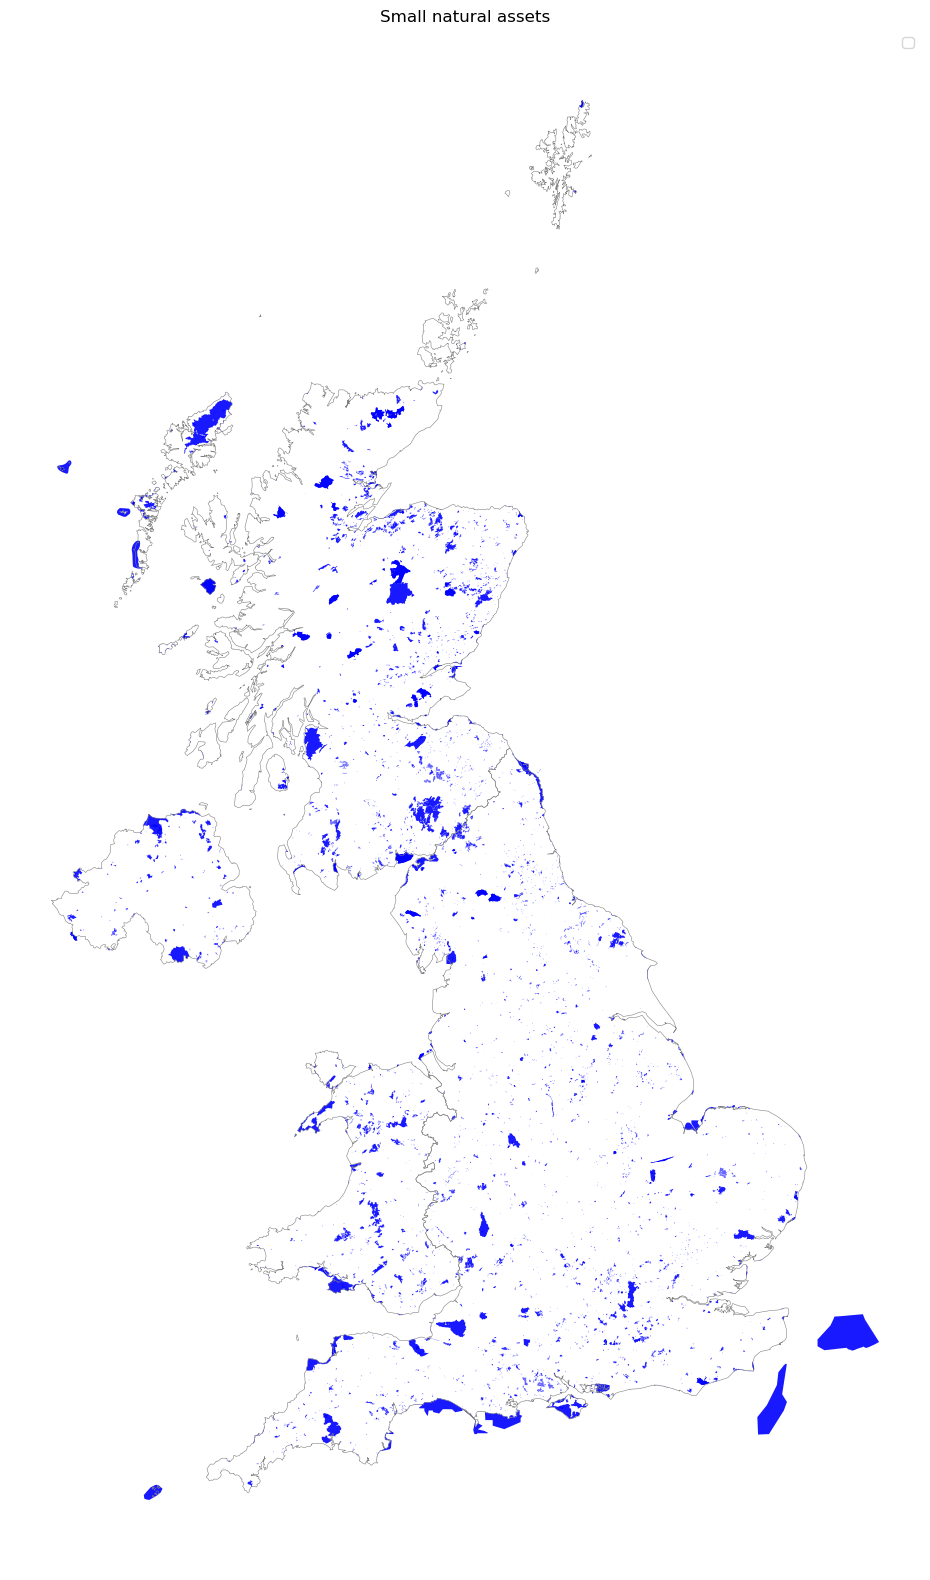

In [374]:
fig, ax = plt.subplots(figsize=(20, 20))

small_combined_dropna_filtered_columns.plot(ax=ax, facecolor="blue", alpha=0.9)
# large_combined_cropped.plot(ax=ax, facecolor="none", linewidth=0.4, edgecolor="black")
uk_boundaries.plot(ax=ax, facecolor="none", linewidth=0.4, edgecolor="grey")

plt.title("Small natural assets")
plt.legend()
plt.axis('off')
plt.show()

## Cropping by country boundary

In [372]:
uk_union = uk_boundaries.union_all()

if isinstance(uk_union, MultiPolygon):
    largest_poly = max(uk_union.geoms, key=lambda x: x.area)
else:
    largest_poly = uk_union

buffered_poly = largest_poly.buffer(200)
uk_largest_polygon = gpd.GeoDataFrame(geometry=[buffered_poly], crs=uk_boundaries.crs)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


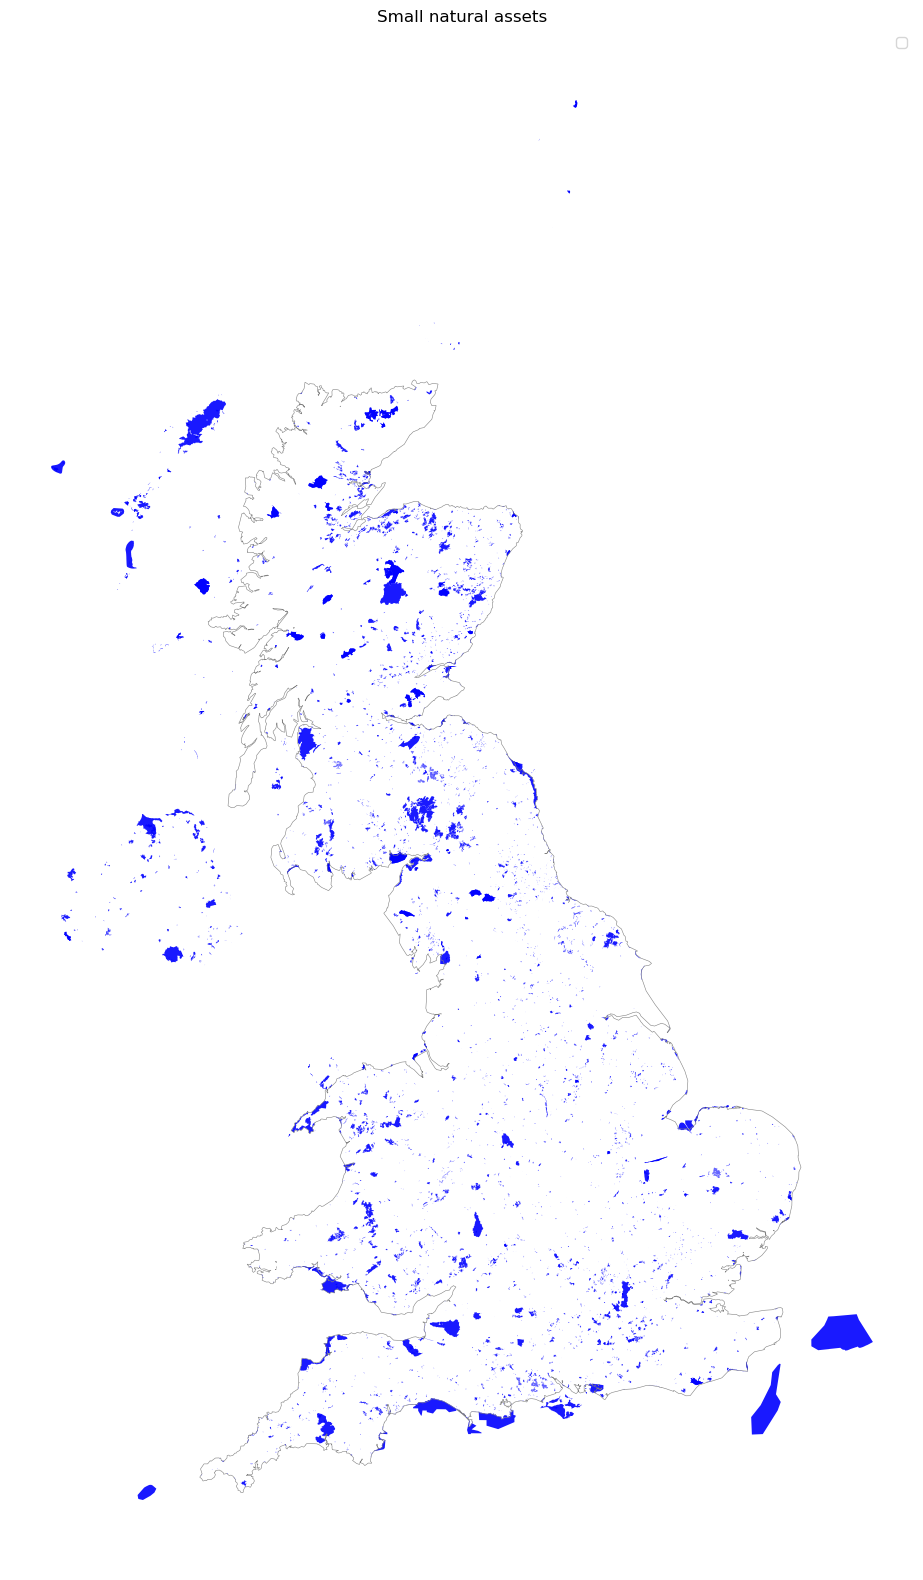

In [375]:
fig, ax = plt.subplots(figsize=(20, 20))

small_combined_dropna_filtered_columns.plot(ax=ax, facecolor="blue", alpha=0.9)
# large_combined_cropped.plot(ax=ax, facecolor="none", linewidth=0.4, edgecolor="black")
uk_largest_polygon.plot(ax=ax, facecolor="none", linewidth=0.4, edgecolor="grey")

plt.title("Small natural assets")
plt.legend()
plt.axis('off')
plt.show()

In [379]:
# Get the main polygon geometry
mainland_geom = uk_largest_polygon.union_all()

# Calculate intersection area and keep only those overlapping ≥ 10%
small_combined_dropna_filtered_columns["overlap_ratio"] = (
    small_combined_dropna_filtered_columns.geometry.intersection(mainland_geom).area /
    small_combined_dropna_filtered_columns.geometry.area
)

# Filter for rows with at least 10% overlap
small_combined_dropna_filtered_columns_mainland = small_combined_dropna_filtered_columns[
    small_combined_dropna_filtered_columns["overlap_ratio"] >= 0.1
].drop(columns="overlap_ratio")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


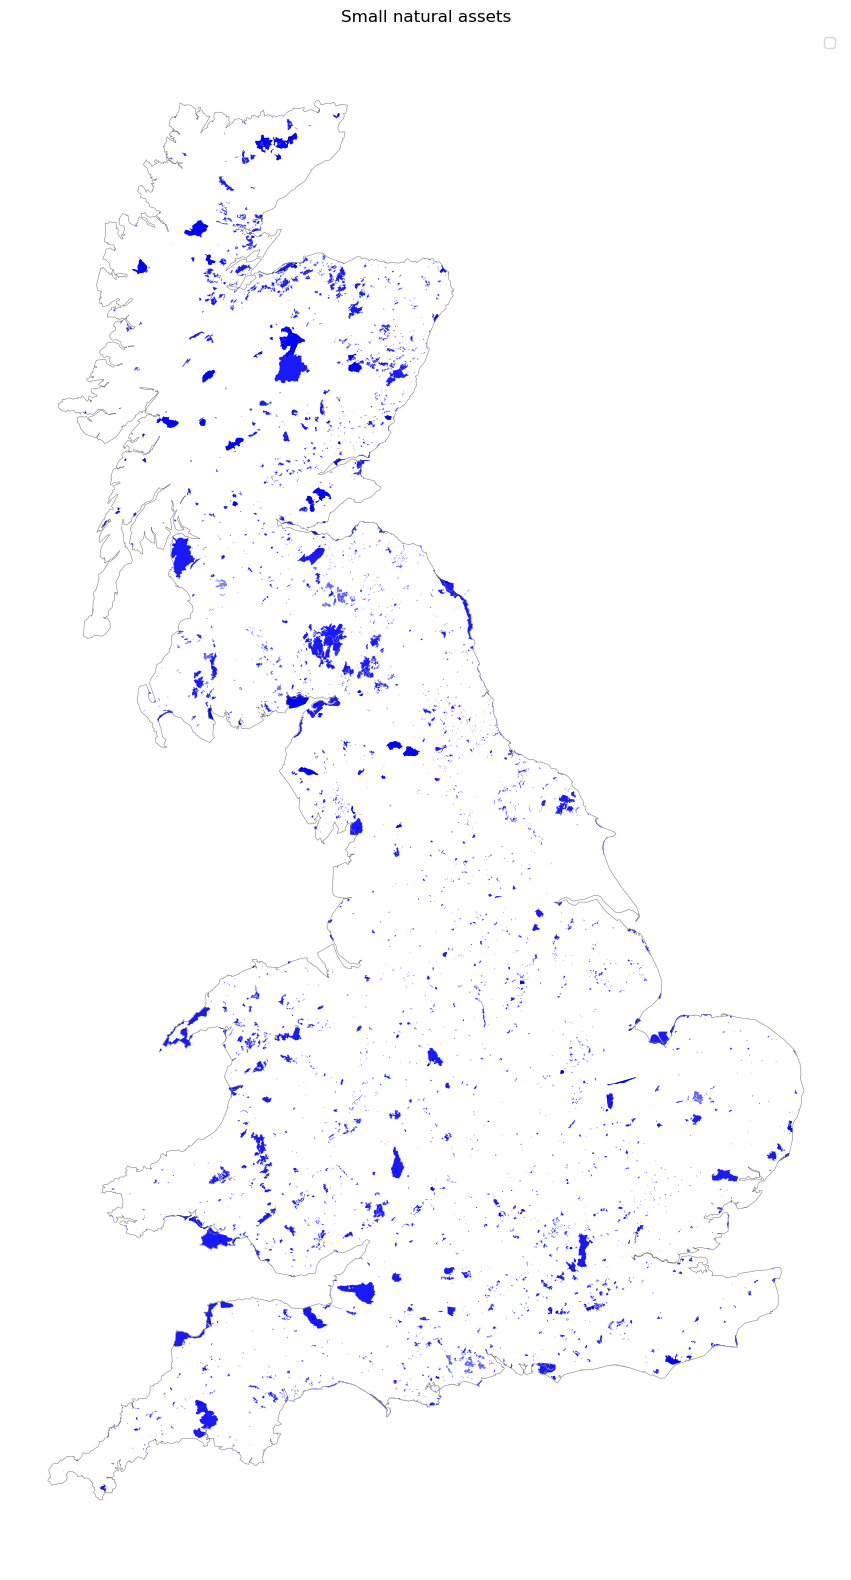

In [380]:
fig, ax = plt.subplots(figsize=(20, 20))

small_combined_dropna_filtered_columns_mainland.plot(ax=ax, facecolor="blue", alpha=0.9)
# large_combined_cropped.plot(ax=ax, facecolor="none", linewidth=0.4, edgecolor="black")
uk_largest_polygon.plot(ax=ax, facecolor="none", linewidth=0.4, edgecolor="grey")

plt.title("Small natural assets")
plt.legend()
plt.axis('off')
plt.show()

In [382]:
small_combined_dropna_filtered_columns_mainland.to_file("natural_assets_data_processed/natural_assets.gpkg", layer='natural_assets', driver="GPKG")